In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
df = pd.read_csv('/content/drive/MyDrive/kaggle2/train.csv')
df.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


#Подготовка данных

Изучим колонки, рассмотрим зависимости между переменными, посмотрим пропуски в данных (заполним их).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

In [5]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,262
Departure and Arrival Time Convenience,0


Заполним пропуски в данных с помощью медианы.

In [6]:
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)

<ipython-input-6-63de6078664e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)


Рассмотрим колонки с категориальными признаками, посмотрим количество видов у каждого. В дальнейшем для обработки заменим их с помощью энкодеров.

In [7]:
print(df['Gender'].unique())
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())
print(df['Satisfaction'].unique())

['Male' 'Female']
['Returning' 'First-time']
['Business' 'Personal']
['Business' 'Economy' 'Economy Plus']
['Satisfied' 'Neutral or Dissatisfied']


Рассмотрим корреляцию между признаками. Видим, что `Arrival Delay` и `Departure Delay` сильно связаны, поэтому удалим один из признаков. Также удалим столбец `ID`, так как он отвечает исключительно за номер клиента, что не должно влиять на его удовлетворенность.

<Axes: >

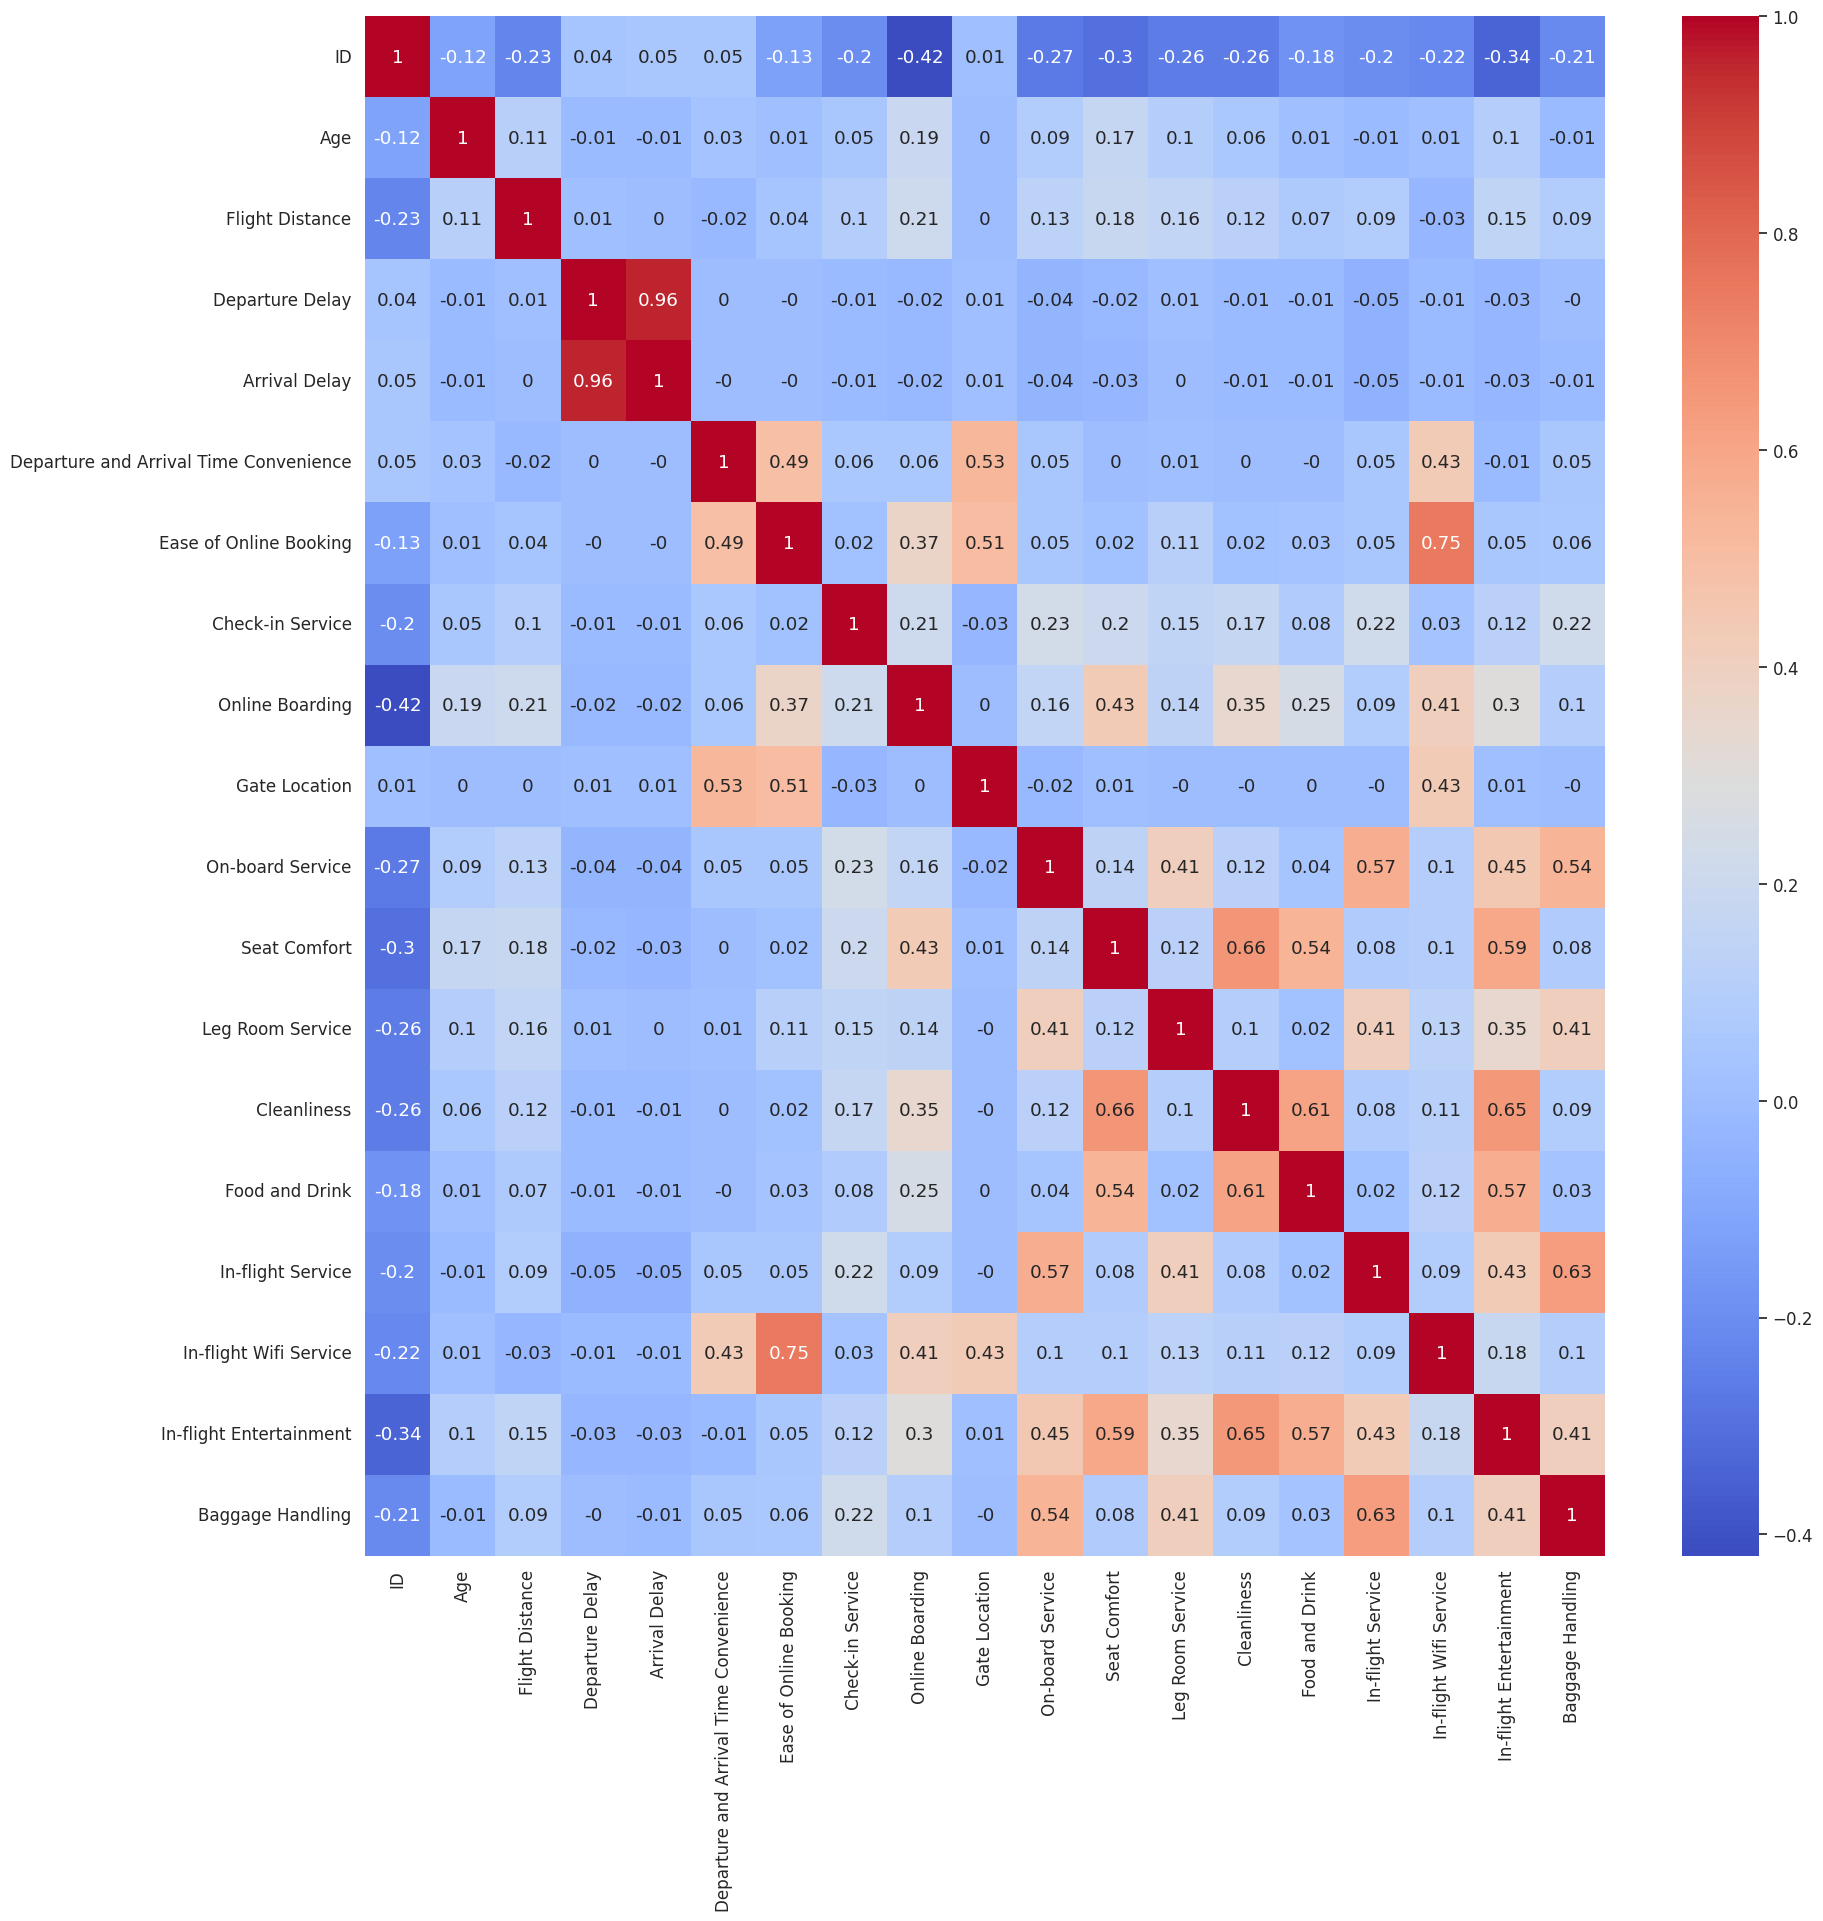

In [8]:
plt.figure(figsize = (20,20))

sns.set(font_scale=1.1)
a = df.corr(numeric_only = True)
sns.heatmap(a.round(2), annot=True, cmap='coolwarm')

In [9]:
#df.drop(columns = ['Ease of Online Booking', 'In-flight Entertainment', 'Arrival Delay', 'Gate Location', 'On-board Service', 'Baggage Handling', 'Cleanliness', 'ID'], inplace = True)

In [10]:
#df.drop(columns = ['In-flight Entertainment','Arrival Delay', 'ID', 'Ease of Online Booking', 'Cleanliness', 'In-flight Service', 'Baggage Handling', 'In-flight Wifi Service','Seat Comfort', 'Gate Location' ], inplace = True)

In [11]:
df.drop(columns=["Arrival Delay", "ID"], inplace=True)

<Axes: >

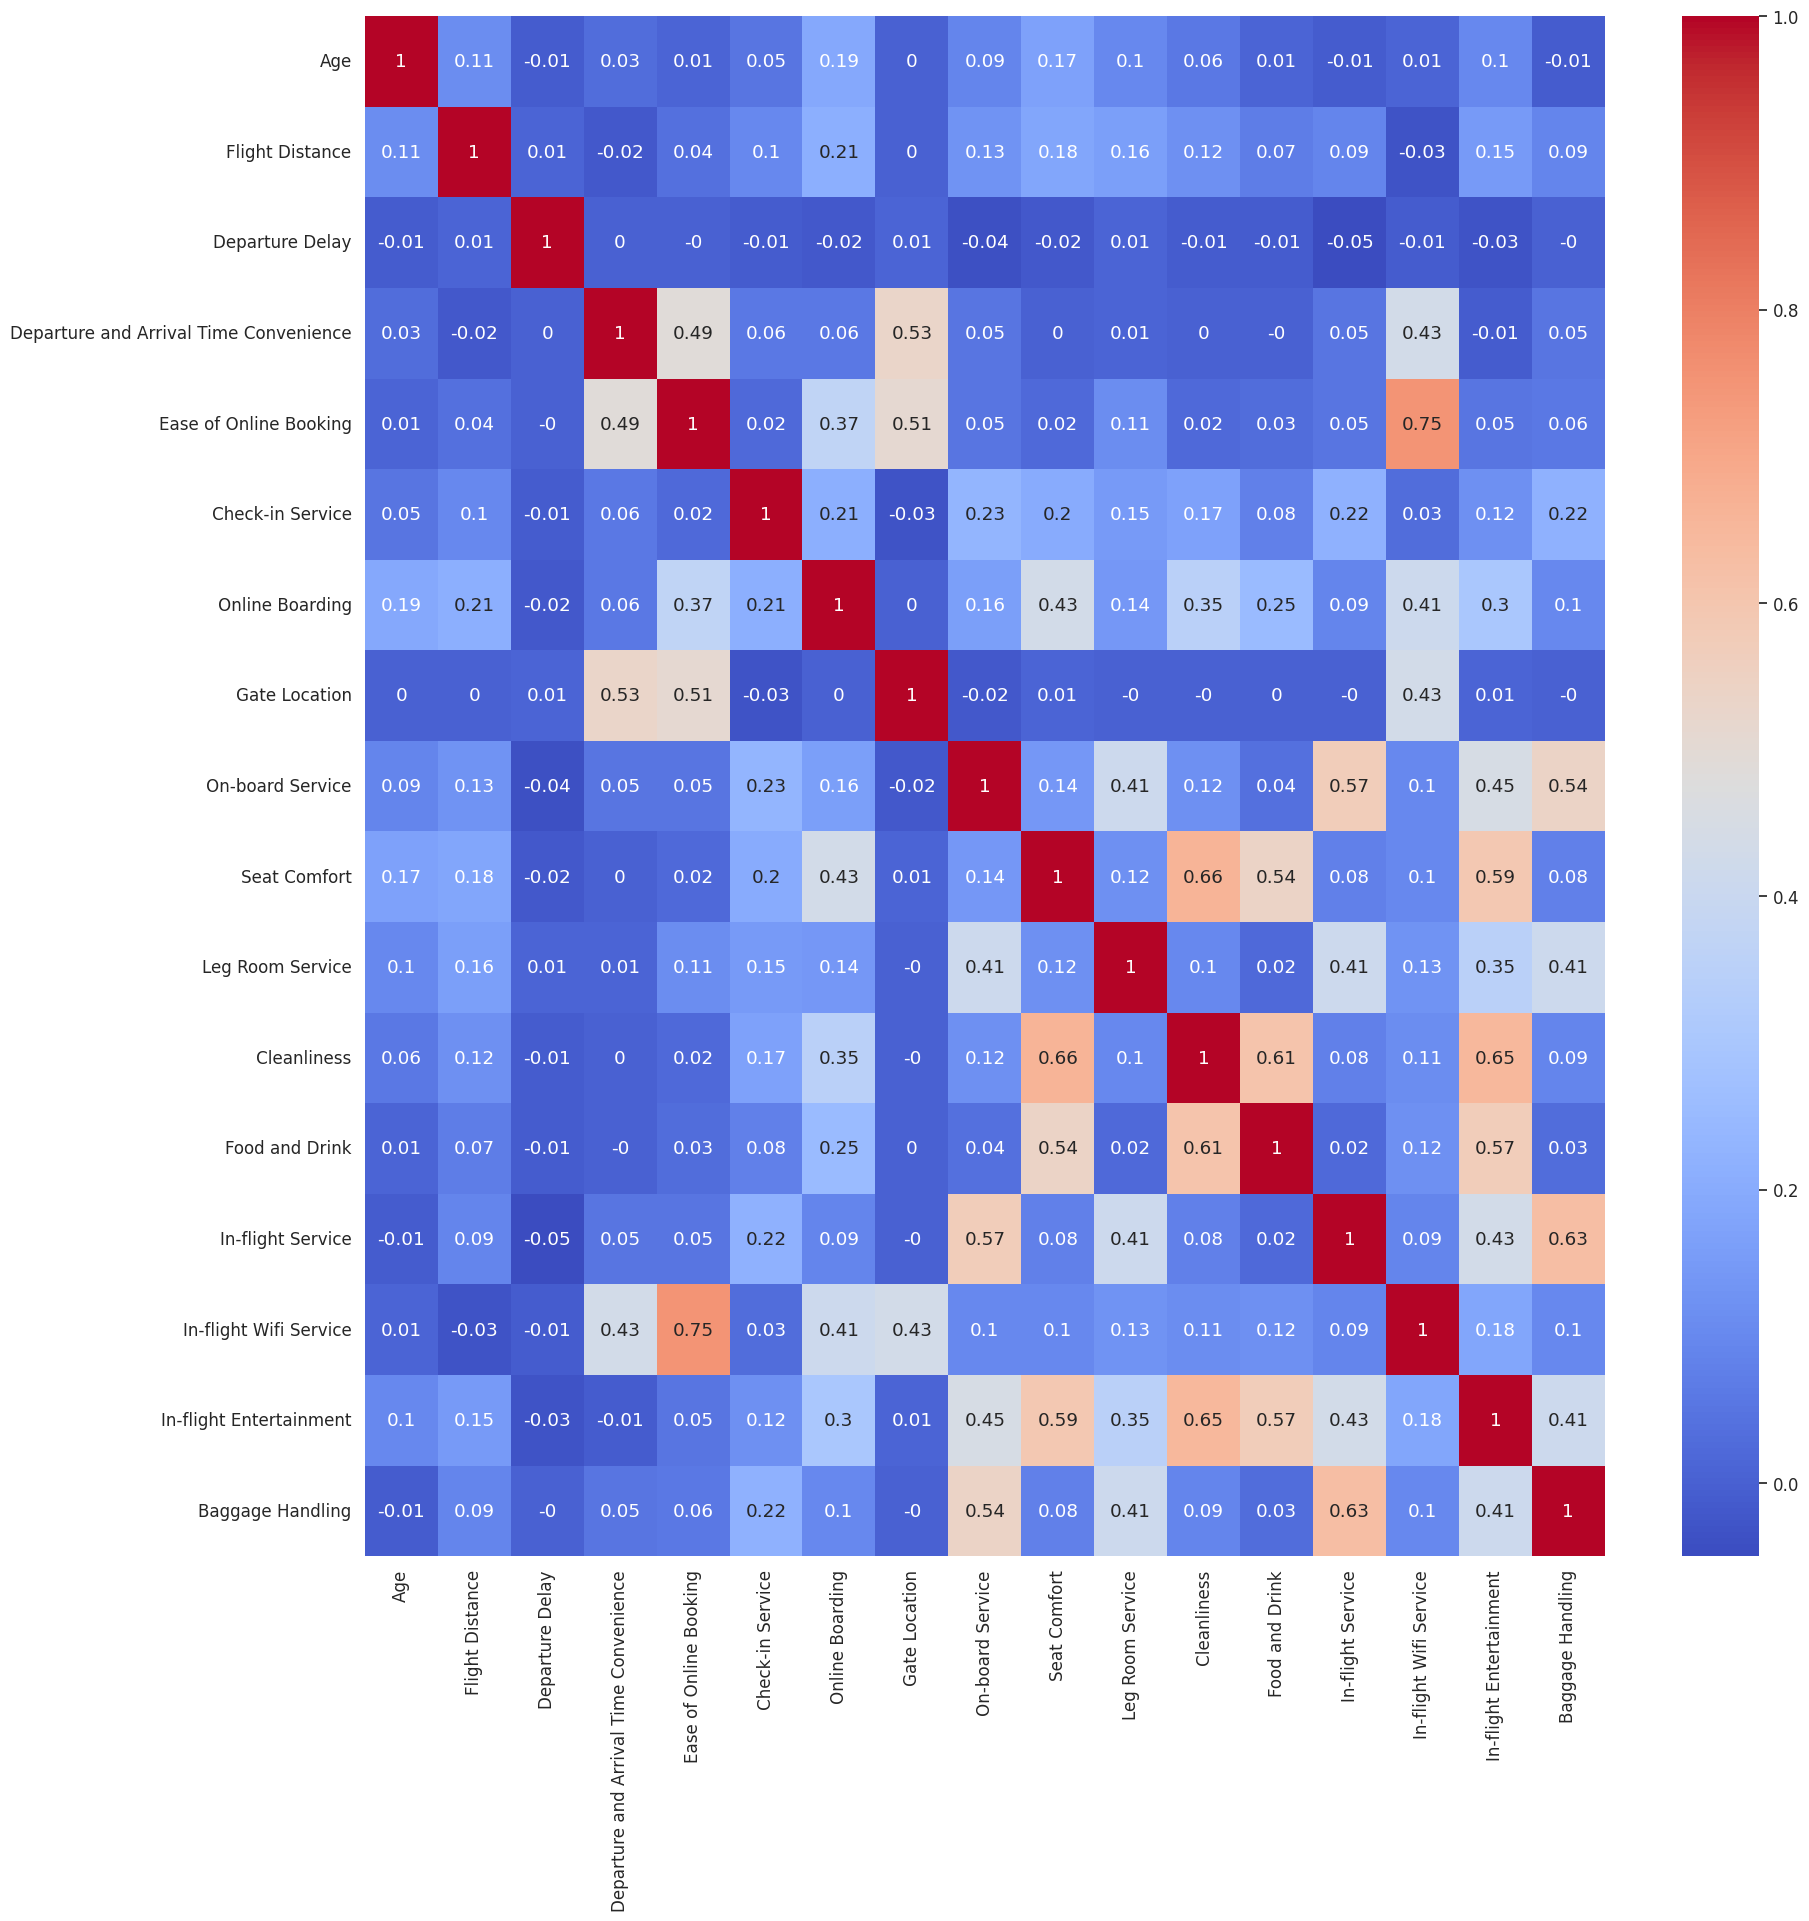

In [12]:
plt.figure(figsize = (20,20))

sns.set(font_scale=1.1)
a = df.corr(numeric_only = True)
sns.heatmap(a.round(2), annot=True, cmap='coolwarm')

#Масштабирование данных

Используем `MinMaxScaler` для масштабирования численных данных.

In [13]:
from sklearn.preprocessing import MinMaxScaler
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df['Satisfaction'])
X = df.drop(columns=['Satisfaction']).select_dtypes(include=['number'])

std = MinMaxScaler()
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

X_std

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,0.500000,0.318457,0.000000,0.2,0.2,1.0,0.8,0.2,1.0,1.0,1.0,0.6,0.4,1.0,0.2,1.0,1.00
1,0.294872,0.272213,0.018844,1.0,1.0,0.2,0.2,1.0,0.6,0.2,1.0,0.2,0.2,0.6,0.2,0.2,0.50
2,0.551282,0.077342,0.000000,1.0,0.8,0.8,0.8,1.0,0.8,1.0,0.8,1.0,0.6,0.8,1.0,0.8,0.75
3,0.525641,0.012924,0.000000,0.6,0.6,0.2,0.4,0.6,1.0,0.2,1.0,0.4,0.2,1.0,1.0,1.0,1.00
4,0.217949,0.022617,0.000000,1.0,0.0,0.8,0.0,0.8,1.0,0.2,0.4,0.2,0.2,0.6,0.0,0.2,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,0.538462,0.258279,0.000000,0.6,0.6,0.6,0.8,0.6,0.8,0.6,0.4,0.6,0.6,0.8,0.8,0.6,0.75
84963,0.000000,0.125000,0.000000,0.6,0.4,0.4,0.4,0.6,0.4,0.2,0.8,0.2,0.2,0.8,0.4,0.2,0.50
84964,0.153846,0.067044,0.000000,1.0,0.6,1.0,0.6,0.6,1.0,1.0,0.6,1.0,1.0,1.0,0.6,1.0,1.00
84965,0.653846,0.689418,0.005653,0.2,0.2,0.6,0.8,0.2,1.0,1.0,1.0,0.6,1.0,1.0,0.2,1.0,1.00


Для категориальных признаков используем энкодеры. Для столбца `Class` используем `OneHotEncoder`, так как ранее мы выяснили, что там будет 3 вида уникальных значений. Для остальных категориальных признаков будем использовать `LabelEncoder`, так как они будут бинарными.

In [14]:
encoder = OneHotEncoder(sparse_output=False)
onehot_columns = encoder.fit_transform(df[['Class']])

# # concat dataframes
X_std = pd.concat([X_std, pd.DataFrame(onehot_columns)], axis=1)
X_std
# # get new encoded column names
encoded_columns_name = encoder.get_feature_names_out(['Class'])
dict_column_names = {0: encoded_columns_name[0],
                     1: encoded_columns_name[1],
                     2: encoded_columns_name[2],}
X_std.rename(columns=dict_column_names,  inplace=True)
X_std.head()


,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class_Business,Class_Economy,Class_Economy Plus
0,0.500000,0.318457,0.000000,0.2,0.2,1.0,0.8,0.2,1.0,1.0,1.0,0.6,0.4,1.0,0.2,1.0,1.00,1.0,0.0,0.0
1,0.294872,0.272213,0.018844,1.0,1.0,0.2,0.2,1.0,0.6,0.2,1.0,0.2,0.2,0.6,0.2,0.2,0.50,1.0,0.0,0.0
2,0.551282,0.077342,0.000000,1.0,0.8,0.8,0.8,1.0,0.8,1.0,0.8,1.0,0.6,0.8,1.0,0.8,0.75,1.0,0.0,0.0
3,0.525641,0.012924,0.000000,0.6,0.6,0.2,0.4,0.6,1.0,0.2,1.0,0.4,0.2,1.0,1.0,1.0,1.00,0.0,1.0,0.0
4,0.217949,0.022617,0.000000,1.0,0.0,0.8,0.0,0.8,1.0,0.2,0.4,0.2,0.2,0.6,0.0,0.2,1.00,0.0,0.0,1.0


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3= LabelEncoder()
X_std['Gender'] = labelencoder1.fit_transform(df['Gender'])
X_std['Customer Type'] = labelencoder2.fit_transform(df['Customer Type'])
X_std['Type of Travel'] = labelencoder3.fit_transform(df['Type of Travel'])
#y = labelencoder.fit_transform(df['Satisfaction'])
X_std.head()

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class_Business,Class_Economy,Class_Economy Plus,Gender,Customer Type,Type of Travel
0,0.500000,0.318457,0.000000,0.2,0.2,1.0,0.8,0.2,1.0,1.0,...,1.0,0.2,1.0,1.00,1.0,0.0,0.0,1,1,0
1,0.294872,0.272213,0.018844,1.0,1.0,0.2,0.2,1.0,0.6,0.2,...,0.6,0.2,0.2,0.50,1.0,0.0,0.0,1,1,0
2,0.551282,0.077342,0.000000,1.0,0.8,0.8,0.8,1.0,0.8,1.0,...,0.8,1.0,0.8,0.75,1.0,0.0,0.0,0,1,0
3,0.525641,0.012924,0.000000,0.6,0.6,0.2,0.4,0.6,1.0,0.2,...,1.0,1.0,1.0,1.00,0.0,1.0,0.0,0,1,0
4,0.217949,0.022617,0.000000,1.0,0.0,0.8,0.0,0.8,1.0,0.2,...,0.6,0.0,0.2,1.00,0.0,0.0,1.0,0,1,0


#Разделение данных

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (72221, 23), (72221,)
Test dataset size: (12746, 23), (12746,)


#Использование моделей

Для начала используем стандартную модель для классификации: **Логистическую регрессию** и посмотрим ее метрики.

In [17]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()

model_log.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = model_log.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [19]:
y_pred_c = labelencoder.fit_transform(y_pred)

In [20]:
from sklearn import metrics

print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1:", metrics.f1_score(y_test, y_pred))
print("precision:", metrics.precision_score(y_test, y_pred))
print("recall:", metrics.recall_score(y_test, y_pred))

accuracy: 0.8611329044406089
f1: 0.8868575811812835
precision: 0.8850472059198775
recall: 0.8886753779144247


Теперь попробуем использовать **Случайный лес** и посмотрим, улучшатся ли метрики.

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_for = RandomForestClassifier()
model_for.fit(X_train, y_train)
y_pred_for = model_for.predict(X_test)

In [22]:
from sklearn import metrics

print("accuracy:", metrics.accuracy_score(y_test, y_pred_for))
print("f1:", metrics.f1_score(y_test, y_pred_for))
print("precision:", metrics.precision_score(y_test, y_pred_for))
print("recall:", metrics.recall_score(y_test, y_pred_for))

accuracy: 0.9548093519535541
f1: 0.9630721887421464
precision: 0.9639373716632443
recall: 0.9622085575198566


Метрики со Случайным лесом стали лучше

#Подготовка тестовых данных

Аналогичным образом подготовим тестовый данные.

In [23]:
df_t = pd.read_csv('/content/drive/MyDrive/kaggle2/test.csv')
df_t.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2


In [24]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      44913 non-null  int64  
 1   Gender                                  44913 non-null  object 
 2   Age                                     44913 non-null  int64  
 3   Customer Type                           44913 non-null  object 
 4   Type of Travel                          44913 non-null  object 
 5   Class                                   44913 non-null  object 
 6   Flight Distance                         44913 non-null  int64  
 7   Departure Delay                         44913 non-null  int64  
 8   Arrival Delay                           44782 non-null  float64
 9   Departure and Arrival Time Convenience  44913 non-null  int64  
 10  Ease of Online Booking                  44913 non-null  in

In [25]:
id = df_t['ID']

In [26]:
df_t.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,131
Departure and Arrival Time Convenience,0


In [27]:
df_t['Arrival Delay'].fillna(df_t['Arrival Delay'].median(), inplace=True)

<ipython-input-27-c9f6db00c213>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_t['Arrival Delay'].fillna(df_t['Arrival Delay'].median(), inplace=True)


In [28]:
#df_t.drop(columns = ['Ease of Online Booking', 'In-flight Entertainment', 'Arrival Delay', 'Gate Location', 'On-board Service', 'Baggage Handling', 'Cleanliness', 'ID'], inplace = True)

In [29]:
#df_t.drop(columns = ['In-flight Entertainment','Arrival Delay', 'ID', 'Ease of Online Booking', 'Cleanliness', 'In-flight Service', 'Baggage Handling', 'In-flight Wifi Service','Seat Comfort', 'Gate Location' ], inplace = True)

In [30]:
df_t.drop(columns=["Arrival Delay", "ID"], inplace=True)

In [31]:
print(df_t['Gender'].unique())
print(df_t['Customer Type'].unique())
print(df_t['Type of Travel'].unique())
print(df_t['Class'].unique())
#print(df_t['Satisfaction'].unique())

['Female' 'Male']
['First-time' 'Returning']
['Business' 'Personal']
['Economy' 'Business' 'Economy Plus']


In [32]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Gender                                  44913 non-null  object
 1   Age                                     44913 non-null  int64 
 2   Customer Type                           44913 non-null  object
 3   Type of Travel                          44913 non-null  object
 4   Class                                   44913 non-null  object
 5   Flight Distance                         44913 non-null  int64 
 6   Departure Delay                         44913 non-null  int64 
 7   Departure and Arrival Time Convenience  44913 non-null  int64 
 8   Ease of Online Booking                  44913 non-null  int64 
 9   Check-in Service                        44913 non-null  int64 
 10  Online Boarding                         44913 non-null  int64 
 11  Ga

#Масштабирование тестовых данных

In [33]:
from sklearn.preprocessing import MinMaxScaler
X_t = df_t.select_dtypes(include=['number'])

std = MinMaxScaler()
X_t_std = std.fit_transform(X_t)
X_t_std = pd.DataFrame(X_t_std, columns=X_t.columns)

X_t_std

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,0.500000,0.191236,0.000000,0.6,0.6,0.00,0.6,0.00,0.8,1.00,0.8,1.0,1.0,0.2,0.6,1.0,0.25
1,0.179487,0.196688,0.000000,0.2,0.2,0.75,0.2,0.50,0.6,0.75,0.8,0.8,0.8,0.8,0.2,0.8,0.75
2,0.410256,0.186389,0.015957,1.0,0.2,0.50,0.2,0.25,0.8,1.00,0.6,0.6,0.6,1.0,0.2,0.6,1.00
3,0.192308,0.148223,0.000000,1.0,0.4,0.75,0.4,0.50,1.0,0.25,0.4,0.4,0.4,1.0,0.4,0.4,1.00
4,0.525641,0.422456,0.007979,0.8,0.8,0.50,0.8,0.75,0.4,0.75,0.4,0.6,0.2,0.4,0.4,0.4,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,0.730769,0.386914,0.023936,1.0,1.0,0.00,0.4,1.00,0.2,0.50,0.2,0.4,0.2,0.2,0.2,0.2,0.00
44909,0.205128,0.232027,0.000000,0.8,0.8,0.25,0.8,0.00,0.6,0.00,1.0,0.4,0.4,0.8,0.8,0.4,0.75
44910,0.551282,0.084814,0.000000,0.4,0.4,0.50,0.2,0.25,0.4,0.00,1.0,0.2,0.2,0.2,0.2,0.2,0.00
44911,0.538462,0.039580,0.003546,0.4,0.4,0.25,0.4,0.50,0.2,1.00,1.0,0.6,0.6,0.6,0.4,0.6,0.75


In [34]:
encoder = OneHotEncoder(sparse_output=False)
onehot_columns = encoder.fit_transform(df_t[['Class']])
#print(pd.DataFrame(onehot_columns))

# # concat dataframes
X_t_std = pd.concat([X_t_std, pd.DataFrame(onehot_columns)], axis=1)
# # get new encoded column names
encoded_columns_name = encoder.get_feature_names_out(['Class'])
dict_column_names = {0: encoded_columns_name[0],
                     1: encoded_columns_name[1],
                     2: encoded_columns_name[2],}
X_t_std.rename(columns=dict_column_names,  inplace=True)
X_t_std.head()

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class_Business,Class_Economy,Class_Economy Plus
0,0.500000,0.191236,0.000000,0.6,0.6,0.00,0.6,0.00,0.8,1.00,0.8,1.0,1.0,0.2,0.6,1.0,0.25,0.0,1.0,0.0
1,0.179487,0.196688,0.000000,0.2,0.2,0.75,0.2,0.50,0.6,0.75,0.8,0.8,0.8,0.8,0.2,0.8,0.75,0.0,1.0,0.0
2,0.410256,0.186389,0.015957,1.0,0.2,0.50,0.2,0.25,0.8,1.00,0.6,0.6,0.6,1.0,0.2,0.6,1.00,0.0,1.0,0.0
3,0.192308,0.148223,0.000000,1.0,0.4,0.75,0.4,0.50,1.0,0.25,0.4,0.4,0.4,1.0,0.4,0.4,1.00,1.0,0.0,0.0
4,0.525641,0.422456,0.007979,0.8,0.8,0.50,0.8,0.75,0.4,0.75,0.4,0.6,0.2,0.4,0.4,0.4,0.25,1.0,0.0,0.0


In [35]:

X_t_std['Gender'] = labelencoder1.transform(df_t['Gender'])
X_t_std['Customer Type'] = labelencoder2.transform(df_t['Customer Type'])
X_t_std['Type of Travel'] = labelencoder3.transform(df_t['Type of Travel'])
#df_t['Satisfaction'] = labelencoder.fit_transform(df_t['Satisfaction'])
X_t_std.head()

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class_Business,Class_Economy,Class_Economy Plus,Gender,Customer Type,Type of Travel
0,0.500000,0.191236,0.000000,0.6,0.6,0.00,0.6,0.00,0.8,1.00,...,0.2,0.6,1.0,0.25,0.0,1.0,0.0,0,0,0
1,0.179487,0.196688,0.000000,0.2,0.2,0.75,0.2,0.50,0.6,0.75,...,0.8,0.2,0.8,0.75,0.0,1.0,0.0,0,0,0
2,0.410256,0.186389,0.015957,1.0,0.2,0.50,0.2,0.25,0.8,1.00,...,1.0,0.2,0.6,1.00,0.0,1.0,0.0,0,1,1
3,0.192308,0.148223,0.000000,1.0,0.4,0.75,0.4,0.50,1.0,0.25,...,1.0,0.4,0.4,1.00,1.0,0.0,0.0,1,1,1
4,0.525641,0.422456,0.007979,0.8,0.8,0.50,0.8,0.75,0.4,0.75,...,0.4,0.4,0.4,0.25,1.0,0.0,0.0,1,1,0


#Предсказание на тестовых данных

In [36]:
from sklearn.linear_model import LogisticRegression

model_log1 = LogisticRegression()

model_log1.fit(X_std, y)

LogisticRegression()

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_for = RandomForestClassifier()
model_for.fit(X_std, y)
y_pred_for = model_for.predict(X_t_std)


In [38]:
X_std.columns

Index(['Age', 'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Class_Business',
       'Class_Economy', 'Class_Economy Plus', 'Gender', 'Customer Type',
       'Type of Travel'],
      dtype='object')

In [39]:
X_t_std.columns

Index(['Age', 'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Class_Business',
       'Class_Economy', 'Class_Economy Plus', 'Gender', 'Customer Type',
       'Type of Travel'],
      dtype='object')

In [40]:
y_t_pred = model_log1.predict(X_t_std)


In [41]:
# ans = pd.DataFrame({'ID': id, 'Satisfaction': labelencoder.fit_transform(y_t_pred)})
# #ans.index.name = 'index'
# ans.to_csv('ans.csv', index=False)


In [42]:
ans = pd.DataFrame({'ID': id, 'Satisfaction': y_pred_for})
#ans.index.name = 'index'
ans.to_csv('ans.csv', index=False)